#Violence Against Women

### Importing and understanding the data

In [389]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [368]:
d =pd.read_csv("Violence Against Women_Turkey.csv")
d.head()

,Unnamed: 0,Name,Date,Murder Motive,Murderer Name,Protection Request,Way Of Killing,News Source 1,News Source 2,Age of Victim,Province,Perpetrator Status,Notes
0,NaN,Tuğçe Baran,29/09/2019,Not Determined,Boyfriend,No,Firearm,http://www.milliyet.com.tr/gundem/evinde-basin...,NaN,of age,Izmir,Prisoner,suspicious Death
1,NaN,Ebru Erdem,20/03/2019,Not Determined,Not Determined,Not Determined,Falling from high,http://www.milliyet.com.tr/istanbul-da-rezidan...,NaN,of age,İstanbul,Investigation Continues,suspicious Death
2,NaN,Songül Önemli,26/10/2019,Not Determined,Not Determined,No,Firearm,http://www.milliyet.com.tr/galeri/sir-dolu-olu...,NaN,of age,Adiyaman,Not Determined,suspicious Death
3,NaN,Cansu Güven,26/10/2019,Not Determined,Not Determined,No,Firearm,http://www.milliyet.com.tr/galeri/sir-dolu-olu...,NaN,of age,Adiyaman,Not Determined,suspicious Death
4,NaN,Maiko Dzidziguri,23.02.2018,Unspecified,Unknown,No,drowning,http://www.milliyet.com.tr/gurcu-kadinin-esrar...,NaN,of age,İstanbul,Unknown,suspicious Death


In [369]:
d.nunique()

Unnamed: 0               0
Name                  3246
Date                  2195
Murder Motive          288
Murderer Name          180
Protection Request      43
Way Of Killing         146
News Source 1         3127
News Source 2          198
Age of Victim           43
Province               146
Perpetrator Status      35
Notes                    3
dtype: int64

In [370]:
d.shape

(6820, 13)

In [371]:
d.isnull().sum()

Unnamed: 0            6820
Name                  3411
Date                  3411
Murder Motive            2
Murderer Name            2
Protection Request       6
Way Of Killing           2
News Source 1         3420
News Source 2         6607
Age of Victim         6501
Province              4765
Perpetrator Status    5365
Notes                 6570
dtype: int64

In [372]:
d.drop(["Date","Name"],inplace=True,axis=1)

In [373]:
for col in d.columns:
    if (d[col].isnull().sum()/len(d)) > 0.60:
        d.drop(col, axis = 1, inplace = True)

In [374]:
d["News Source 1"].fillna("Unknown Source",inplace=True)

In [375]:
d.dropna()

,Murder Motive,Murderer Name,Protection Request,Way Of Killing,News Source 1
0,Not Determined,Boyfriend,No,Firearm,http://www.milliyet.com.tr/gundem/evinde-basin...
1,Not Determined,Not Determined,Not Determined,Falling from high,http://www.milliyet.com.tr/istanbul-da-rezidan...
2,Not Determined,Not Determined,No,Firearm,http://www.milliyet.com.tr/galeri/sir-dolu-olu...
3,Not Determined,Not Determined,No,Firearm,http://www.milliyet.com.tr/galeri/sir-dolu-olu...
4,Unspecified,Unknown,No,drowning,http://www.milliyet.com.tr/gurcu-kadinin-esrar...
...,...,...,...,...,...
6815,Crisis and Unemployment,husband,No,Cutting tool,Unknown Source
6816,Divorce,husband,Not Determined,Cutting tool,Unknown Source
6817,Crisis and Unemployment,husband,Not Determined,Firearm,Unknown Source
6818,Divorce,husband,Unrealized,Firearm,Unknown Source


In [376]:
d.reset_index(drop=True)

,Murder Motive,Murderer Name,Protection Request,Way Of Killing,News Source 1
0,Not Determined,Boyfriend,No,Firearm,http://www.milliyet.com.tr/gundem/evinde-basin...
1,Not Determined,Not Determined,Not Determined,Falling from high,http://www.milliyet.com.tr/istanbul-da-rezidan...
2,Not Determined,Not Determined,No,Firearm,http://www.milliyet.com.tr/galeri/sir-dolu-olu...
3,Not Determined,Not Determined,No,Firearm,http://www.milliyet.com.tr/galeri/sir-dolu-olu...
4,Unspecified,Unknown,No,drowning,http://www.milliyet.com.tr/gurcu-kadinin-esrar...
...,...,...,...,...,...
6815,Crisis and Unemployment,husband,No,Cutting tool,Unknown Source
6816,Divorce,husband,Not Determined,Cutting tool,Unknown Source
6817,Crisis and Unemployment,husband,Not Determined,Firearm,Unknown Source
6818,Divorce,husband,Unrealized,Firearm,Unknown Source


In [377]:
d.shape

(6820, 5)

### Visualization and Analysis

In [378]:
def count(d,a):
  plt.figure(figsize=(10,8))
  ax = sns.countplot(data=d,y=a,order=dict(Counter(d[a]).most_common(15)))

  total = 6814

  for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 20
    y = p.get_y() + p.get_height()/2 
    ax.annotate(percentage,(x,y))

plt.show()

As we can see from the below graph above 30 percent of the reason for the violence was discussion.

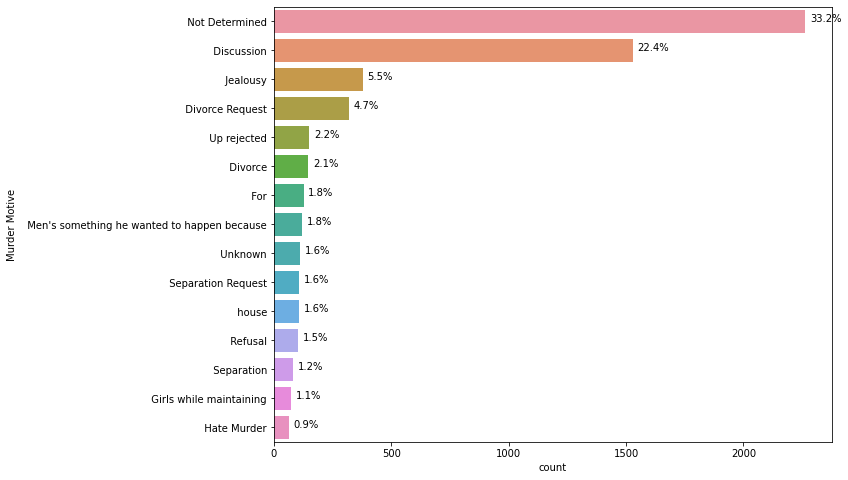

In [379]:
count(d,"Murder Motive")

The graph below tells us that most of the violence towards women were due to their Husbands with a rate of approximately 33% which is 1 in every 3 women.

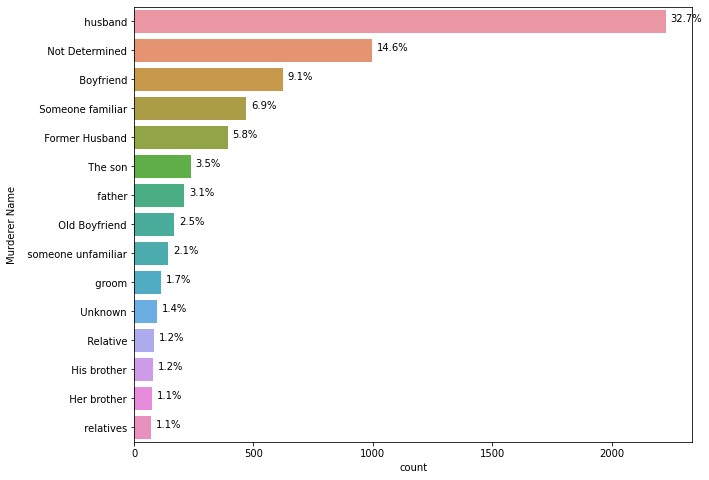

In [380]:
count(d,"Murderer Name")

This graph tells us that 86.3 percent of women did not even request for protection from violence.

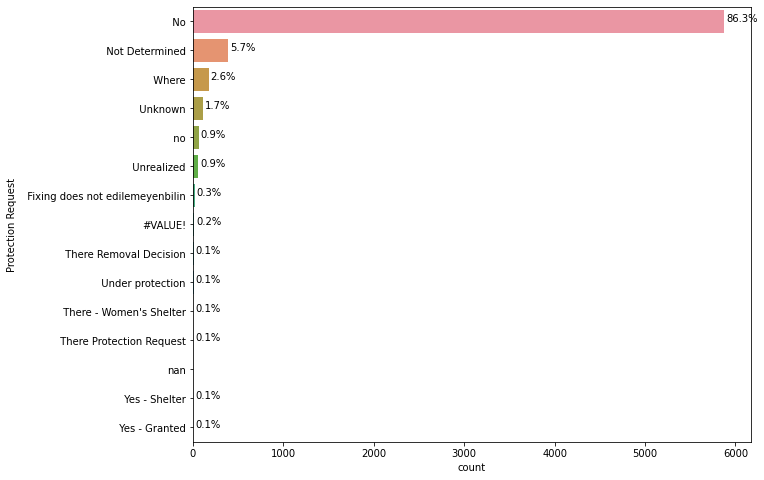

In [381]:
count(d,"Protection Request")

We can see that most of the violence was done using firearms at a straggering rate of 44.7% and about 20 percent using cutting tools.

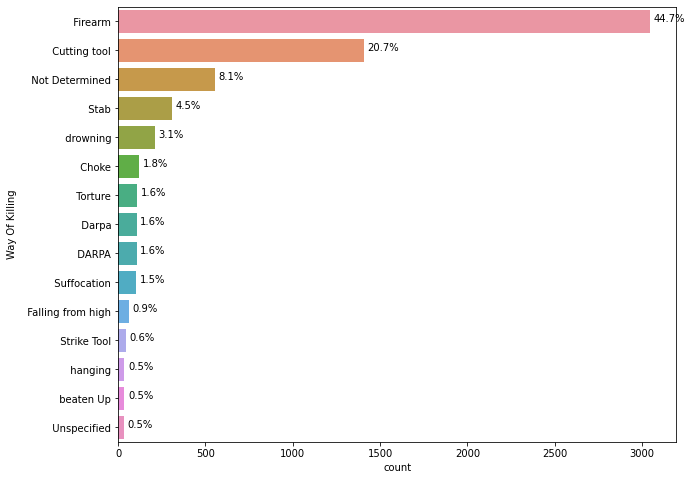

In [382]:
count(d,"Way Of Killing")

In [383]:
def domain_name(url):
    return url.split("www.")[-1].split("//")[-1].split(".")[0]

d['News Source 1'] = d['News Source 1'].apply(domain_name)

We can see that the news source milliyet has covered most of these cases.

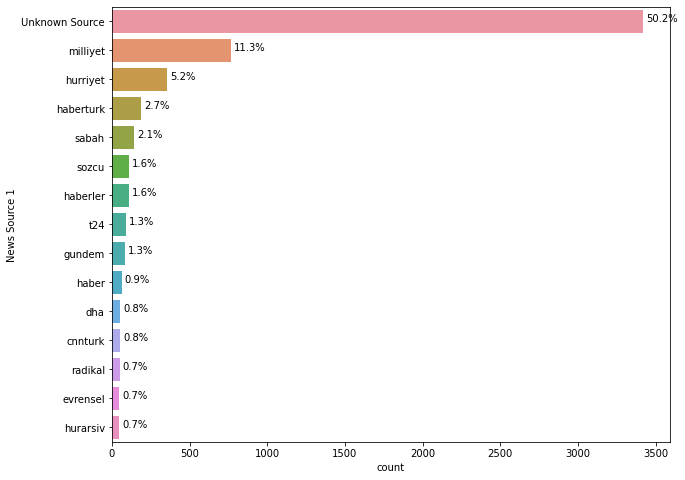

In [384]:
count(d,"News Source 1")

In [433]:
def mix(d,column,target,column1):
  total = 6819
  df = []
  o1 = []
  for i in range (0,6819):
    c=0
    if(d[column][i]==target):
      df.append(d[column1][i])
  o = Counter(df).most_common(10)

  for i in range(0,10):
    for j in range(0,o[i][1]):
      o1.append(o[i][0])

  plt.figure(figsize=(10,8))
  ax = sns.countplot(y=o1,palette = "Set2",order=Counter(o1))

  for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 1
    y = p.get_y() + p.get_height()/1.5 
    ax.annotate(percentage,(x,y))

  return o

From the below graph we can see that Boyfriends mostly use firearms and cutting tools.

[('  Firearm', 276),
 ('  Cutting tool', 120),
 ('  Stab', 30),
 ('  drowning', 22),
 ('  Not Determined', 22),
 ('  Choke', 22),
 ('  Darpa', 14),
 ('  DARPA', 14),
 ('  Torture', 8),
 ('  Darpa, Cutting Tools', 6)]

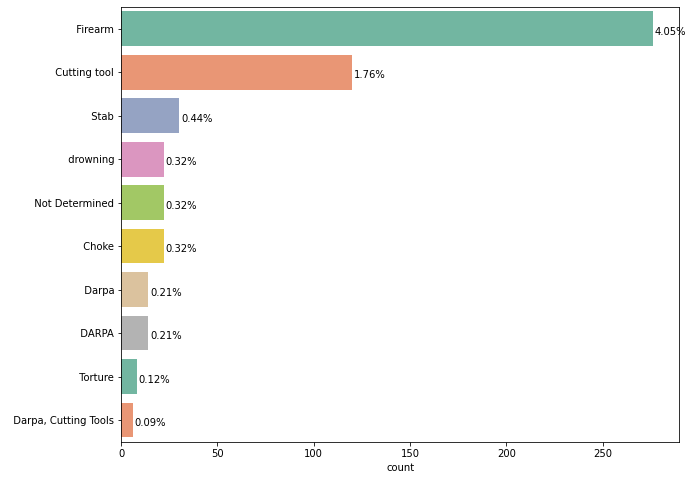

In [434]:
mix(d,"Murderer Name","  Boyfriend","Way Of Killing")

As we can see cutting tools are mostly used by husbands.

[('  husband', 558),
 ('  Not Determined', 128),
 ('  Boyfriend', 120),
 ('  Someone familiar', 104),
 ('  Former Husband', 102),
 ('  The son', 86),
 ('  someone unfamiliar', 30),
 ('  father', 24),
 ('  His brother', 22),
 ('  Old Boyfriend', 22)]

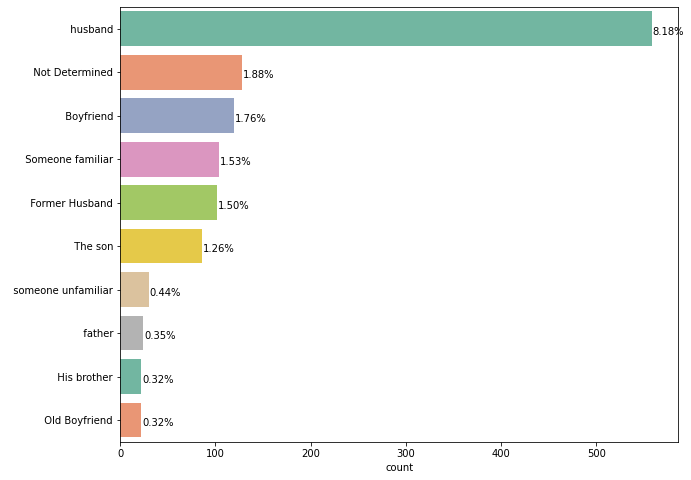

In [401]:
mix(d,"Way Of Killing","  Cutting tool","Murderer Name")

We can see here that violence due to stab is mostly covered by sabah.

[('Unknown Source', 156),
 ('sabah', 16),
 ('gundem', 12),
 ('haberturk', 10),
 ('haber', 9),
 ('milliyet', 9),
 ('hurriyet', 8),
 ('posta', 6),
 ('usakhabermerkezi', 4),
 ('radikal', 4)]

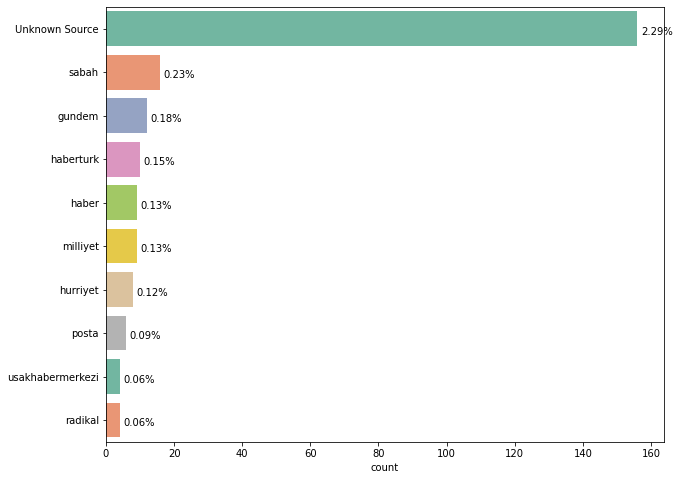

In [402]:
mix(d,"Way Of Killing","  Stab","News Source 1")

We see that the reason of violence for husbands is mostly discussion.

[('  Discussion', 680),
 ('  Not Determined', 424),
 ('  Divorce Request', 310),
 ('  Jealousy', 190),
 ('  Divorce', 84),
 ("  Men's something he wanted to happen because", 62),
 ('  Separation Request', 46),
 ('  Suspicions of infidelity', 34),
 ('  Crisis and Unemployment', 32),
 ('  Up rejected', 20)]

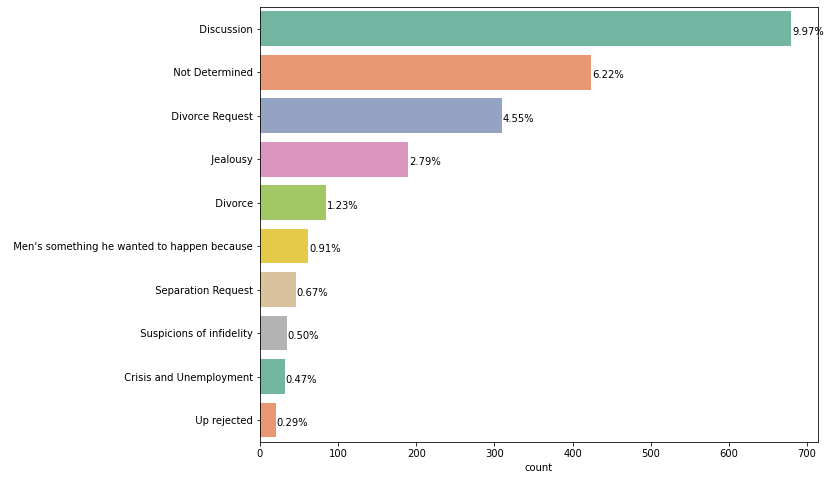

In [406]:
mix(d,"Murderer Name","  husband","Murder Motive")